# Imports

In [1]:
import pynncml as pnc  
from matplotlib import pyplot as plt

/Users/haihab01/envs/research_base/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load OpenCML Dataset

In [2]:
time_slice = slice("2015-06-01", "2015-06-10")  # Time Interval

In [3]:
link_set, ps = pnc.datasets.load_open_mrg( time_slice=time_slice, change2min_max=True)
link_set.plot_links(scale=True, scale_factor=64)
plt.grid()
plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
plt.show()#%% md
# Select Link and Plot link data

to ./data//OpenMRG.zip


/Users/haihab01/projects/PhD/PyNNcml/pynncml/datasets/loaders.py:247: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'sublink' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds_multindex = ds.assign_coords({'sublink': df_metadata.index})


ValueError: too many values to unpack (expected 2)

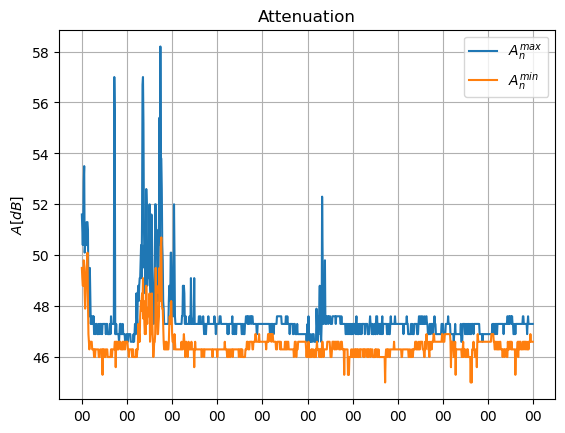

In [6]:
link_set.get_link(0).plot()

# Run Statistics wet dry classification
This section performance wet dry classification using statistics test, this method introduced by [1]. <br>
The first step is calculating the standard deviation over a window of samples using the following equation:
$$ \sigma_n=\Bigg[\frac{1}{|W_n|}\sum_{k \in W_n}\Big(A_k-E_{W_n}[A]\Big)^2\Bigg]^{\frac{1}{2}} $$ <br>
where $W_n$ is a moving standard deviation window in range $[n,n+N_w]$ , $A_k$ is the instance attenuation measurement of sample $k$ and $A$ is the vector of all samples and
$N_w=|W_n|$ is an hyper-parameter that set the window size. <br> 
$$E_{W_n}[A]=\frac{1}{|W_n|}\sum_{k \in W_n}A_k $$  <br>
Once we obtained the standard deviation vector $\sigma_n$, the following threshold function is apply
\begin{equation}
\hat{y}^{wd}_n=\begin{cases}
1 \quad \sigma_n>\sigma_0 \\
0 \quad\text{o.w} 
\end{cases}
\end{equation} <br>
where $\hat{y}^{wd}_n=1$ is wet even and $\hat{y}^{wd}_n=0$ is dry event and $\sigma_0$ is an hyper-parameter. 

In [8]:
swd = pnc.scm.wet_dry.statistics_wet_dry(1.1, 4) # init classification model
wd_classification, std_vector = swd(link_set.get_link(0).attenuation()) # run classification method

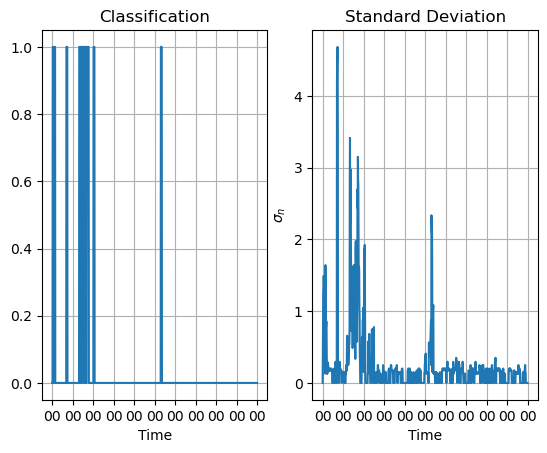

In [9]:
plt.subplot(1, 2, 1)
plt.plot(link_set.get_link(0).time(), wd_classification.numpy()[0, :])
plt.title('Classification')
plt.xlabel('Time')
pnc.change_x_axis_time_format('%H')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(link_set.get_link(0).time(), std_vector.numpy()[0, :])
plt.xlabel('Time')
plt.title('Standard Deviation')
pnc.change_x_axis_time_format('%H')
plt.ylabel(r'$\sigma_n$')
plt.grid()
plt.show()

# References
[1] Marc Schleiss and Alexis Berne. Identification of dry and rainy periods using telecommuni-
cation microwave links. IEEE Geoscience and Remote Sensing Letters, 7(3):611–615, 2010

